In [1]:
from regressors import *

In [2]:
import pickle


In [6]:

df = pickle.load(open('data_dvd_reduced.p','rb'))
data = df.values

In [7]:
n_stations = data.shape[0]
metadata = create_metadata(n_stations, 100, 100)

In [29]:
data = data.iloc[:,-100:-1]
neighbor = create_neighor_list(metadata, k=10)
ts_rawdata = data.fillna(0).values
ts_data, ANSWER = add_noise(ts_rawdata, 0.01)

56 96 	 9.443
49 85 	 6.49
58 53 	 -7.041
1087 45 	 6.555
258 75 	 -4.455
1056 35 	 7.115
246 49 	 -2.603
35 33 	 6.168
715 20 	 9.586
882 3 	 1.049
227 89 	 -5.583
563 12 	 0.942
235 42 	 0.476
1292 41 	 4.273
437 11 	 0.334
856 26 	 -8.745
1017 30 	 7.582
188 47 	 4.578
760 45 	 1.274
492 92 	 -7.106
524 75 	 -8.298
713 88 	 9.817
1338 57 	 -4.462
205 54 	 1.083
585 86 	 -7.372
535 73 	 2.44
1278 76 	 -4.765
862 19 	 -0.829
904 8 	 7.981
183 79 	 4.895
1298 32 	 -7.613
77 3 	 2.291
917 46 	 -7.167
443 43 	 -8.441
676 56 	 9.395
782 82 	 -6.012
192 37 	 -7.743
51 17 	 -0.97
1073 8 	 5.248
53 56 	 -2.51
84 19 	 -4.035
6 48 	 -8.189
523 96 	 -6.573
1235 73 	 9.597
58 21 	 2.327
1245 17 	 4.083
1303 82 	 -2.84
1129 30 	 4.912
560 20 	 -4.918
1308 15 	 -1.272
1326 71 	 -5.917
902 4 	 7.129
541 54 	 -8.758
407 25 	 -7.533
796 94 	 4.563
490 32 	 -3.114
1202 62 	 3.912
722 20 	 -6.983
24 22 	 1.553
391 69 	 -2.595
104 16 	 -1.31
378 94 	 5.219
960 54 	 2.429
406 26 	 2.992
217 42 	 -9.713
7

1324 68 	 -7.535
765 43 	 -0.88
146 51 	 -4.781
1210 38 	 8.731
479 65 	 -8.801
933 20 	 0.208
44 53 	 -1.048
1292 6 	 4.91
1312 92 	 9.017
132 11 	 4.459
1317 70 	 8.137
3 80 	 3.006
1021 51 	 -0.83
808 55 	 1.298
333 81 	 1.142
967 34 	 7.547
141 65 	 -9.551
642 66 	 -2.386
1304 18 	 6.927
1275 83 	 -8.224
641 94 	 -8.849
113 4 	 -6.351
414 18 	 -2.007
315 28 	 4.669
1117 77 	 -3.23
795 11 	 6.715
84 20 	 -9.993
994 65 	 -2.628
1092 56 	 4.408
860 10 	 -1.776
1324 56 	 -0.469
1172 36 	 -3.789
1094 30 	 2.325
1224 82 	 -5.535
1136 75 	 5.882
354 23 	 7.079
89 48 	 -6.289
941 39 	 2.214
592 26 	 -5.11
380 20 	 2.917
439 7 	 2.382
1054 94 	 -9.425
206 25 	 2.679
781 29 	 7.402
160 81 	 5.81
1132 77 	 7.447
49 73 	 -6.685
937 75 	 -9.073
494 39 	 3.586
829 29 	 1.168
1174 65 	 -9.799
875 68 	 2.698
1240 62 	 3.899
211 28 	 -1.342
1318 85 	 0.676
38 21 	 4.819
972 93 	 -4.984
372 85 	 2.759
504 79 	 4.424
371 82 	 -6.523
754 49 	 0.932
619 58 	 -3.622
1004 4 	 -3.491
1077 12 	 7.609
426 6

In [39]:
STAT = evaluator(ts_data, ANSWER, neighbor, n_regressors=10, n_variables=2, eps=3)
STAT

{'TP': 842,
 'TN': 128638,
 'FP': 147,
 'FN': 450,
 'n_stations': 1341,
 'n_timestep': 97,
 'n_tsdata': 130077,
 'p_noises': 0.010001768183460566,
 'precision': 0.8513650151668352,
 'recall': 0.651702786377709,
 'f1': 0.7382726874177991}

In [40]:
STAT = evaluator(ts_data, ANSWER, neighbor, n_regressors=100, n_variables=2, eps=3)
STAT

{'TP': 848,
 'TN': 128633,
 'FP': 152,
 'FN': 444,
 'n_stations': 1341,
 'n_timestep': 97,
 'n_tsdata': 130077,
 'p_noises': 0.010001768183460566,
 'precision': 0.848,
 'recall': 0.6563467492260062,
 'f1': 0.7399650959860384}

# random test

In [7]:
s = int(random.choice(lst_noises).split('_')[0])
print(s)
print([v for v in lst_noises if v.startswith(str(s) + '_')])

287
['287_14', '287_19', '287_2', '287_6', '287_71', '287_80', '287_88']


In [8]:
n_variables = 2
idx = random.choices(neighbor[s],k=n_variables)
print(idx)
y = ts_data[s]
X = ts_data[neighbor[s]]
reg = LinearRegression().fit(X.T, y)
predict = reg.intercept_ + np.dot(X.T, reg.coef_)
score = reg.score(X.T,y)
print(score)

[797, 563]
0.9584821623776345


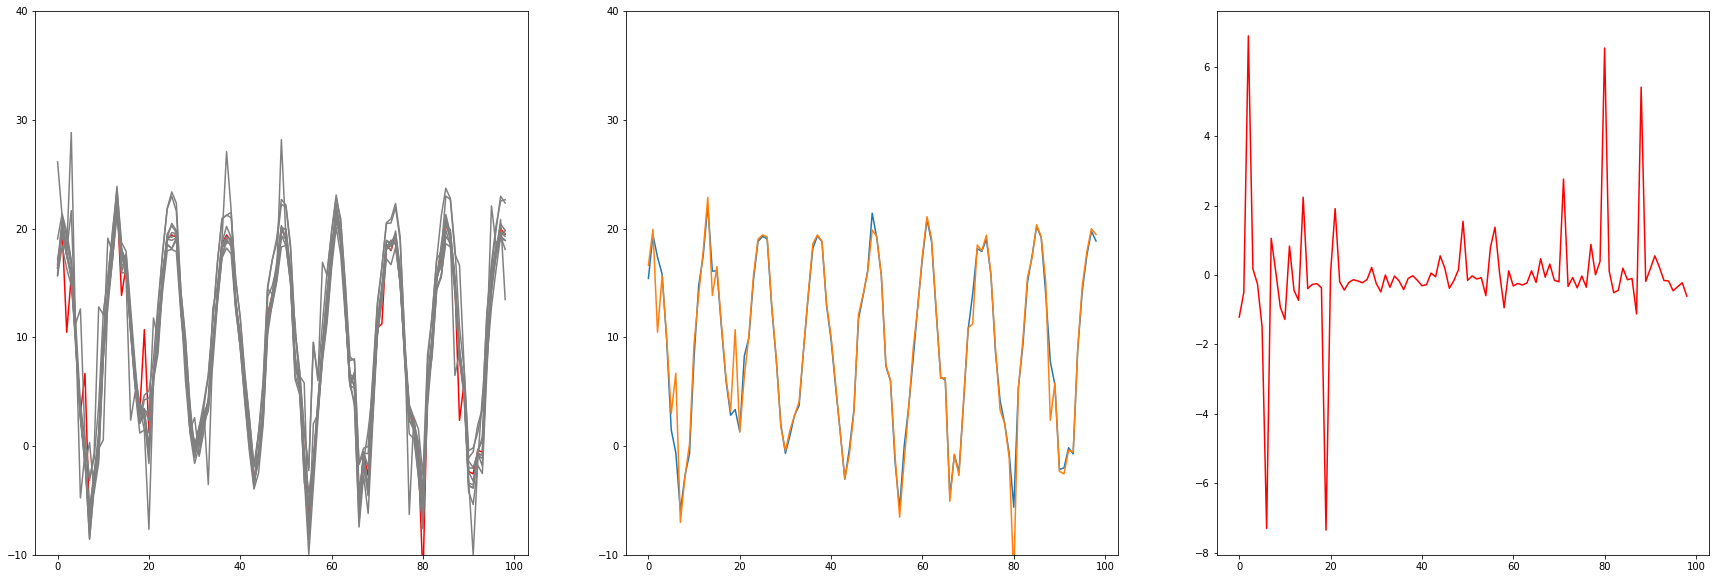

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(30,10))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)



ax1.plot(ts_data[s], color='red')
ax1.plot(ts_data[neighbor[s]].T, color='grey')


ax2.plot(predict)
ax2.plot(y)

ylim = [-10,40]
ax1.set_ylim(ylim)
ax2.set_ylim(ylim)

diff = predict-y

ax3.plot(diff, color='red')


In [14]:
mean = np.mean(diff)
sd = np.std(diff)
np.where((diff >= mean + 1* sd)  | (diff  <= mean - 1* sd ))

(array([ 2,  6, 14, 19, 21, 71, 80, 88]),)

In [11]:
d = list(set([int(v.split("_")[1]) for v in lst_noises if v.startswith(str(s))]))
d.sort()

In [12]:
d

[2, 6, 14, 19, 71, 80, 88]

In [13]:
result=regression_based_outlier_detection(ts_data, neighbor, 5, 2, eps=2, station = s)
print(result)

['287_2', '287_3', '287_6', '287_14', '287_19', '287_71', '287_80', '287_88']


In [ ]:
s

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(ts_data[0])

In [ ]:
metadata.iloc[0]

In [ ]:
metadata.iloc[neighbor[0]]

In [ ]:
metadata[neighbor[0]]

In [ ]:
ts_data[metadata[neighbor[0]]]

In [ ]:
ts_data.shape

In [ ]:
metadata.shape

In [ ]:
data

In [ ]:
data.loc[metadata[:,0],:]

In [ ]:
import pandas as pd
len(pd.Series(metadata[:,0]).unique())

In [ ]:

data = data.loc[metadata[:,0],:]

In [ ]:
data = data.drop_duplicates()

In [ ]:
pickle.dump(data, open('data_reduced','wb'))

In [ ]:
df = pd.DataFrame(metadata).set_index(0)



In [ ]:
df.columns = ['latitude','longitude']

In [ ]:

df = df.loc[data.index, :]

In [ ]:

(data.index == df.index).sum()

In [ ]:
pickle.dump(df, open('metadata_reduced','wb'))

In [28]:
STAT

{'TP': 4287,
 'TN': 124692,
 'FP': 251,
 'FN': 2188,
 'n_stations': 1341,
 'n_timestep': 98,
 'n_tsdata': 131418,
 'p_noises': 0.05000076093077052,
 'precision': 0.9446892904363156,
 'recall': 0.6620849420849421,
 'f1': 0.7785344592754019}